# Sample Distribution vs. Sampling Distribution

## Objetivo
Demonstrar a diferença entre:
- **Sample Distribution:** Distribuição de uma única amostra.
- **Sampling Distribution:** Distribuição das médias de múltiplas amostras.

## Método
1. **Gerar População Artificial**:
   - Distribuição Gaussiana: `μ = 50`, `σ = 10`.
   - Tamanho da população: `N = 10.000`.
   ```python
2. **Extrair Amostras**:
   - Tamanho da amostra (n) = 100.
   - Número de amostras (k) = 1 para Sample Distribution e 1000 para Sampling Distribution.
3. **Avaliar Probabilidades**:
   - Probabilidade de um valor estar acima de 70 na população.
   - Probabilidade de uma média amostral estar acima de 55 na sampling distribution.

## Importação das Bibliotecas do Projeto

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

## PARTE A

### 1. Criar População

In [3]:
np.random.seed(42)  # Para reprodutibilidade
mu, sigma = 50, 10
N = 10000
populacao = np.random.normal(mu, sigma, N)

### 2. Sample Distribution (uma amostra)

In [4]:
n = 100
amostra = np.random.choice(populacao, n)

### 3. Sampling Distribution (médias de várias amostras)

In [5]:
k = 1000
medias_amostrais = []

for _ in range(k):
    sample = np.random.choice(populacao, n)
    medias_amostrais.append(np.mean(sample))

medias_amostrais = np.array(medias_amostrais)

### 4. Plotar os gráficos

#### População

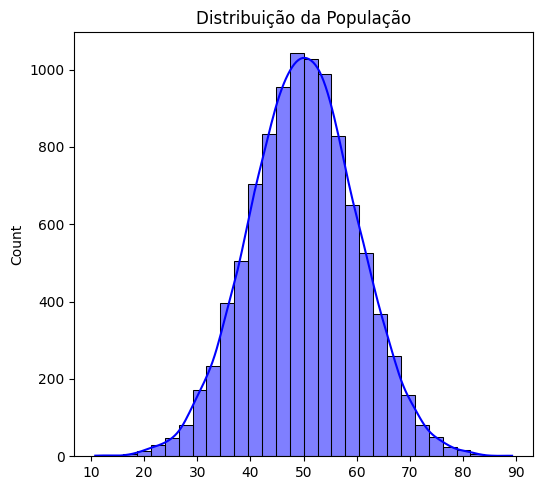

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.histplot(populacao, kde=True, color='blue', bins=30)
plt.title('Distribuição da População')

plt.tight_layout()
plt.show()